In [1]:
import jax
import os
import jax.numpy as jnp
import numpy as np
from jax import random
import time
import pickle
import matplotlib.pyplot as plt

In [2]:
if os.path.isdir('datasets/8mfsk'):
    pass
else:
    os.system('mkdir datasets/8mfsk')

### Dataset generation
Sampling rate 1 kHz


8 equally distant MFSK symbols, one noise signal spacing of 100 Hz

Symbol duration 3

Power has gone through ideal AGC so strength of received signal is equal to one.

Noise will be at Carrier Noise Density ratio 15 dB

Number of waveforms per frequnecy = 1000

1 % frequnency offset



In [ ]:
sampling_rate = 1000
frequnecies = jnp.arange(1, 9, 1)*100
duration = 3
samples = int(int(sampling_rate) * duration)
CNO_list =  [15, 20, 25, 30, 35]
num_waveforms = 100
freq_offset_percent_list = [0, 0.01, 0.02, 0.03, 0.04, 0.05]

t = jnp.linspace(0, 3, samples)

waveforms = []

key = random.PRNGKey(time.time_ns())


for CNO in CNO_list:
    waveforms_first_layer = []
    for freq_offset_percent in freq_offset_percent_list:
        waveforms_second_layer = []
        for idx, freq in enumerate(frequnecies):
            for i in range(num_waveforms):
                key, subkey = random.split(key)
                phase = random.uniform(key, shape=(1,), minval=0, maxval=2*jnp.pi)
                freq_off = freq + jax.random.uniform(key, 1, minval=-freq*freq_offset_percent/2,maxval=freq*freq_offset_percent/2)
                wave = jnp.sqrt(2)*jnp.sin(2*jnp.pi*freq_off*t + phase) + jax.random.normal(subkey, shape=(samples))*jnp.sqrt(sampling_rate/2*1/10**(CNO/10))
                waveforms_second_layer.append((wave/jnp.sqrt(jnp.mean(wave**2)), idx))
        for i in range(num_waveforms):
            key, subkey = random.split(key)
            waveforms_second_layer.append((jax.random.normal(key, (samples)), 8))
        waveforms_first_layer.append(waveforms_second_layer)
    waveforms.append(waveforms_first_layer)
# Save waveforms
with open(f'datasets/8mfsk/test_set_waveforms_CNO_{CNO_list}_and{freq_offset_percent}.pkl', 'wb') as f:
    pickle.dump(waveforms, f)

<class 'jaxlib.xla_extension.ArrayImpl'>
1.0000001


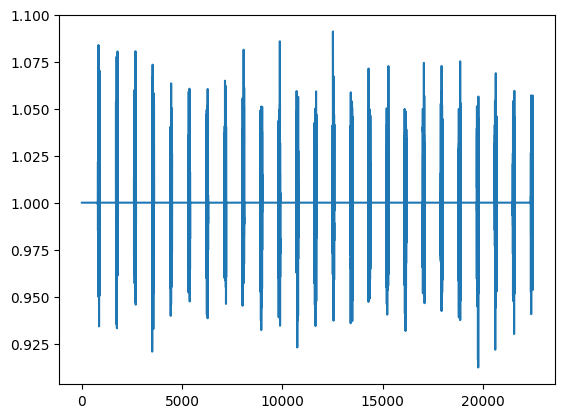

In [7]:
# Calculate mean power of all waveforms
print(type(waveforms[1001][0]))
print(jnp.mean(waveforms[0][0]**2))
mean_power = [jnp.mean(x[0]**2) for x in waveforms]
plt.plot(mean_power)

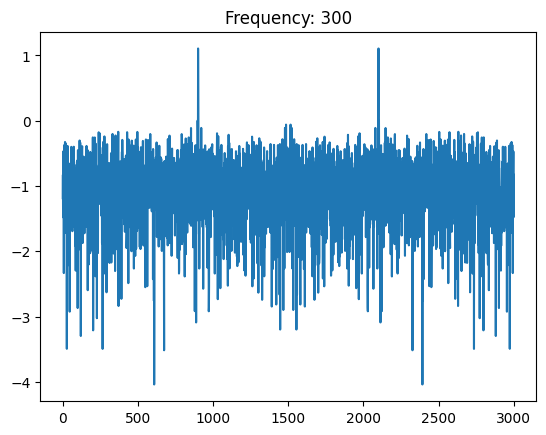

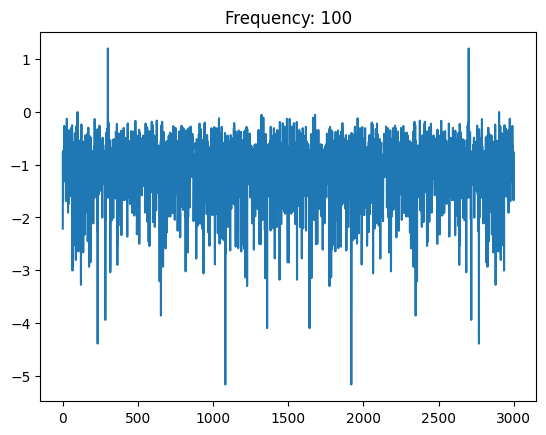

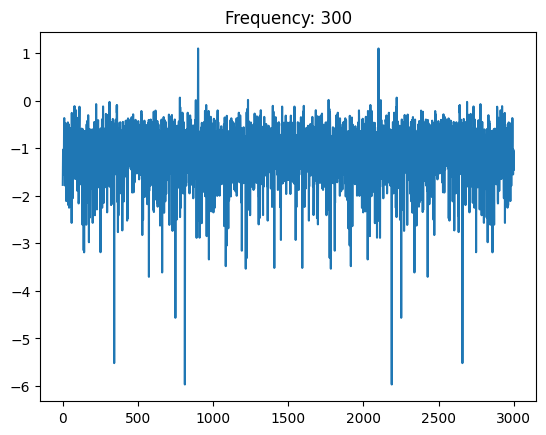

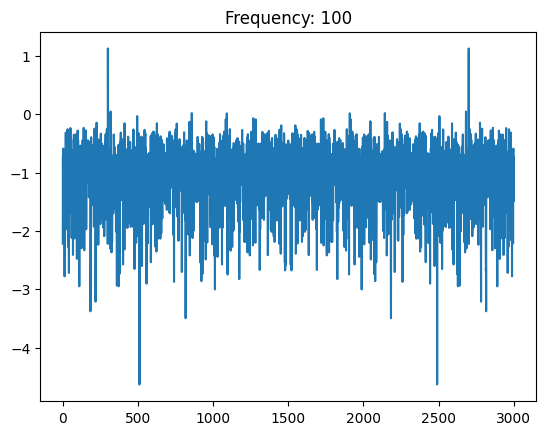

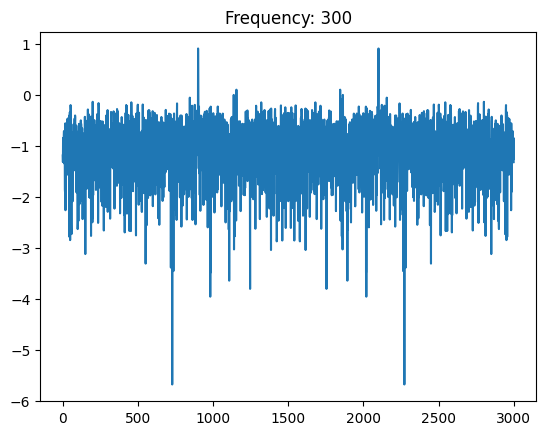

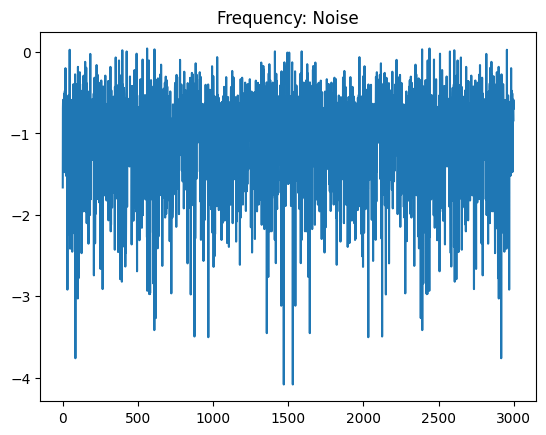

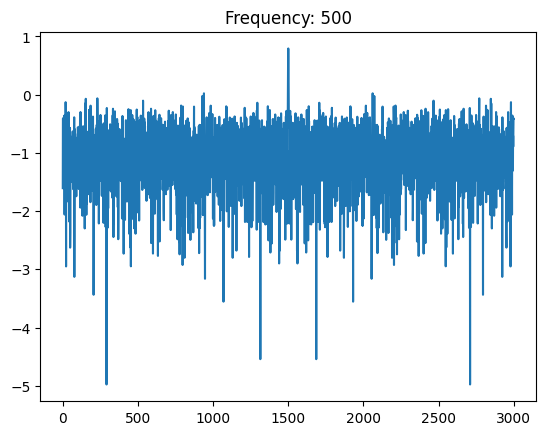

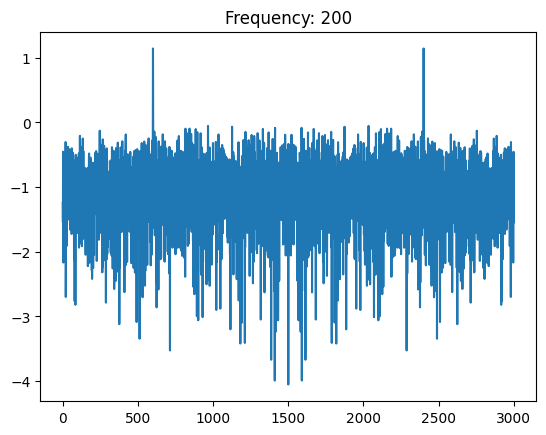

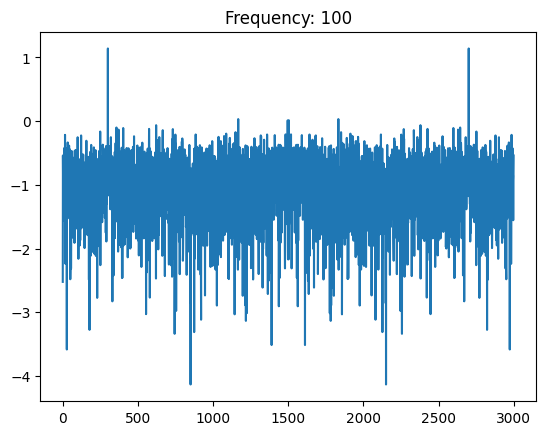

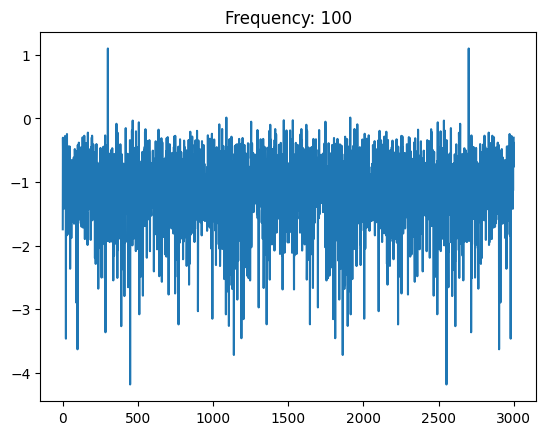

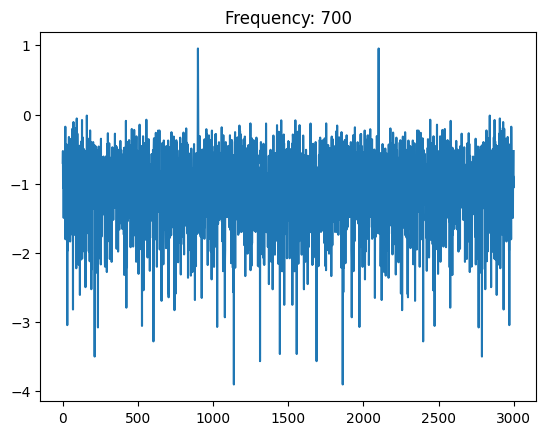

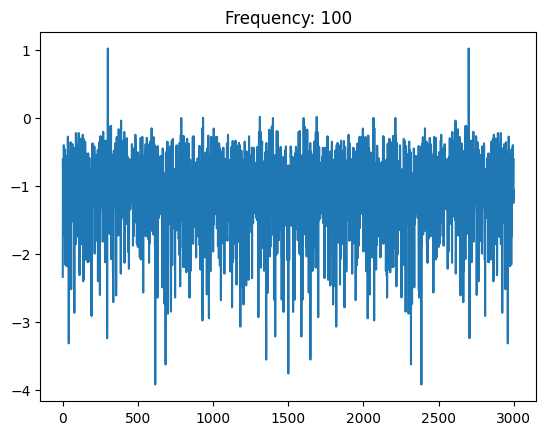

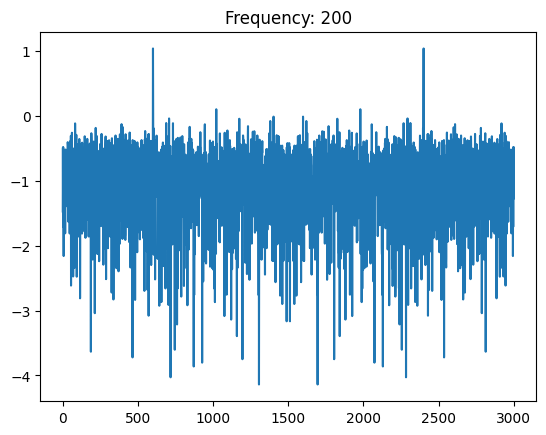

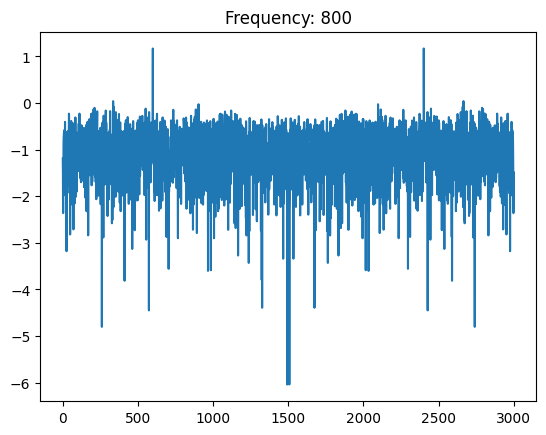

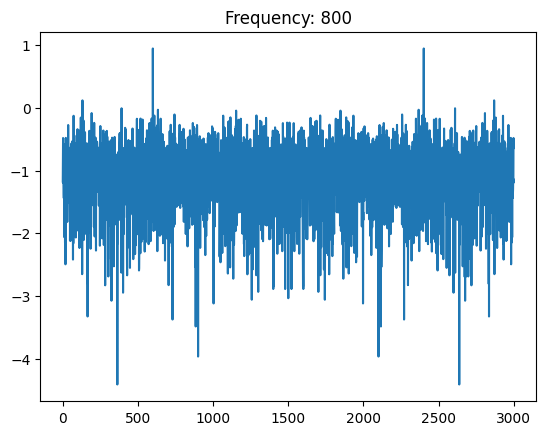

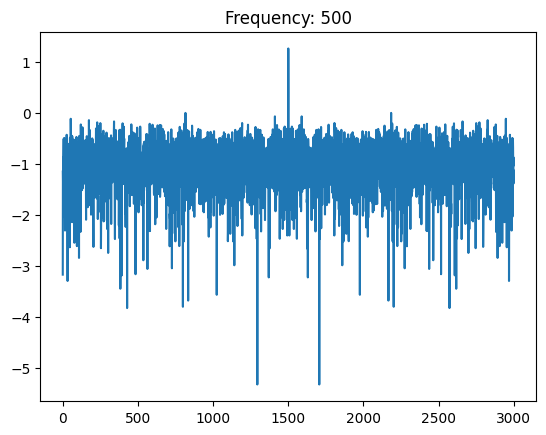

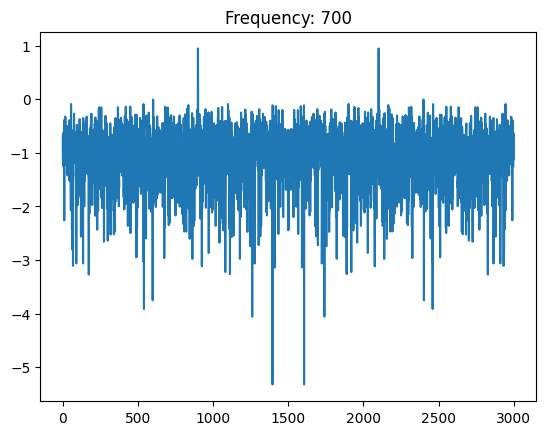

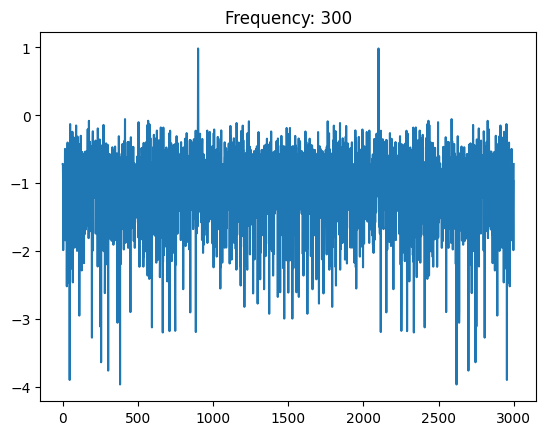

KeyboardInterrupt: 

In [ ]:
# # Verify 100 random waveforms from the dataset by doing fft plot

# for i in range(100):
#     k = np.random.choice(len(waveforms_with_noise))
#     plt.figure()
#     plt.plot(jnp.log10(jnp.abs(jnp.fft.fft(waveforms_with_noise[k][0]))[:10000]**2/20000))
#     plt.title(f'Frequency: {frequnecies[waveforms_with_noise[k][1]] if waveforms_with_noise[k][1]!= 8 else "Noise"}')
#     plt.show()
#     plt.close()

In [ ]:
from scipy.signal import welch

phase = random.uniform(key, shape=(1,), minval=0, maxval=2*jnp.pi)
waveform = jnp.sqrt(2)*jnp.sin(2*jnp.pi*(frequnecies[7]+random.uniform(subkey, 1, minval=-frequency_offset[7]/2,maxval=frequency_offset[7]/2))*t + phase)
noise = waveform 
subkey, _ = random.split(subkey)

freq, psd = welch(noise, fs=sampling_rate, scaling='spectrum')
N0_psd = jnp.mean(psd)
N0_psd, 10*np.log10(1/N0_psd*2)

NameError: name 'frequency_offset' is not defined

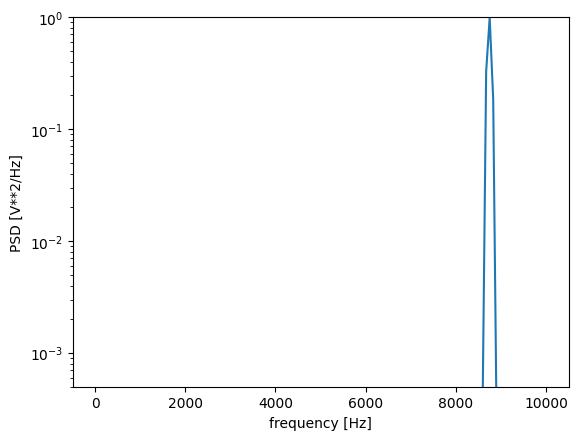

In [ ]:
plt.semilogy(freq, psd)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()